# Исследование объявлений о продаже квартир

Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Требуется выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Открытие файла с данными и изучение общей информации. 

1.1 Импортируем библиотеки pandas и matplotlib.pyplot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1.2 Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

1.3 Выведем первые 15 строчек датафрейма data на экран.

In [3]:
pd.set_option('display.max_columns', None)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.4 Выведем основную информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1.4 Рассмотрим столбцы датафрейма:
<br><br>
<li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
<li>balcony — число балконов</li>
<li>ceiling_height — высота потолков (м)</li>
<li>cityCenters_nearest — расстояние до центра города (м)</li>
<li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)</li>
<li>first_day_exposition — дата публикации</li>
<li>floor — этаж</li>
<li>floors_total — всего этажей в доме</li>
<li>is_apartment — апартаменты (булев тип)</li>
<li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
<li>last_price — цена на момент снятия с публикации</li>
<li>living_area — жилая площадь в квадратных метрах (м²)</li>
<li>locality_name — название населённого пункта</li>
<li>open_plan — свободная планировка (булев тип)</li>
<li>parks_around3000 — число парков в радиусе 3 км</li>
<li>parks_nearest — расстояние до ближайшего парка (м)</li>
<li>ponds_around3000 — число водоёмов в радиусе 3 км</li>
<li>ponds_nearest — расстояние до ближайшего водоёма (м)</li>
<li>rooms — число комнат</li>
<li>studio — квартира-студия (булев тип)</li>
<li>total_area — общая площадь квартиры в квадратных метрах (м²)</li>
<li>total_images — число фотографий квартиры в объявлении</li>


1.5 Построим общую гистограмму для всех столбцов таблицы.

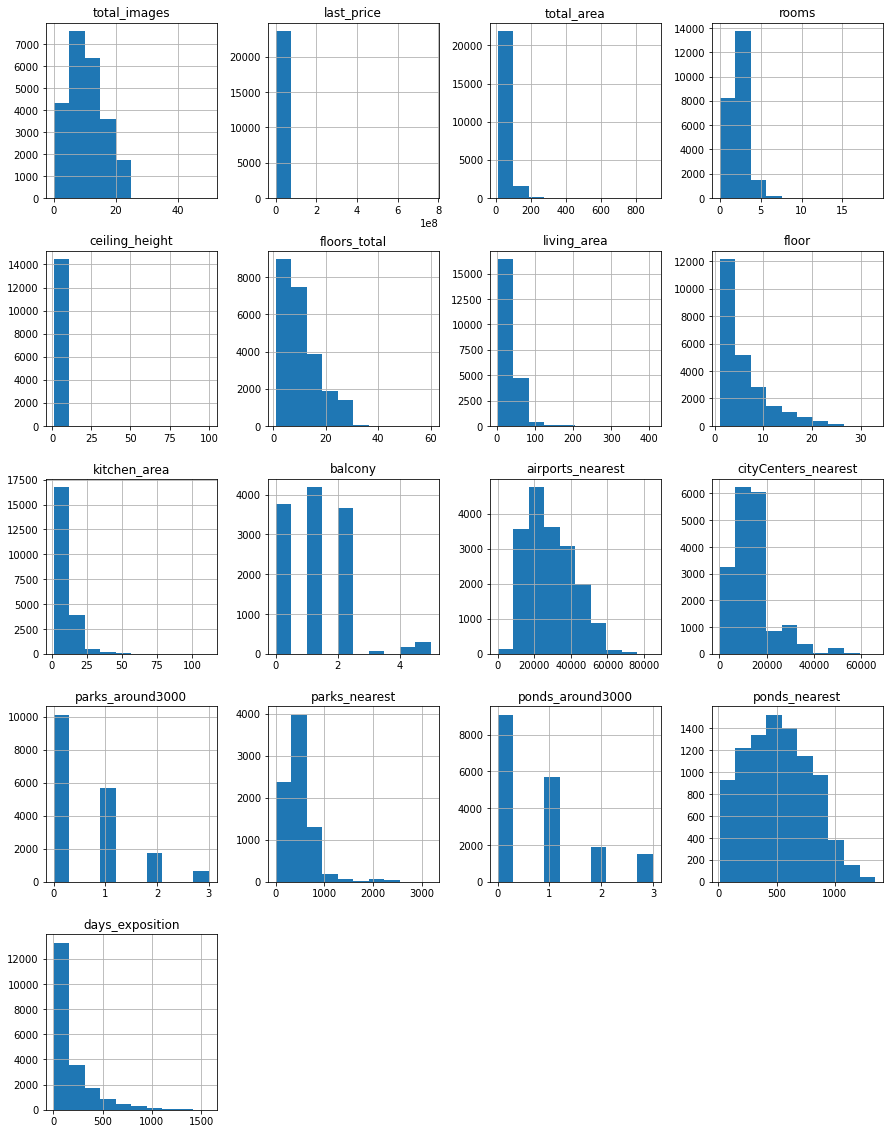

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

2.1 Приведем названия столбцов в соответствие с хорошим стилем: 

In [6]:
data = data.rename(columns = {'cityCenters_nearest':'city_сenters_nearest',
                         'parks_around3000':'parks_around_3000',
                         'ponds_around3000':'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

2.2 Выведем количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

2.3 Заполним пропущенные значения там, где это возможно. 

Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 

Аналогично для столбцов 'parks_around_3000' (наличие парков в округе) и 'ponds_around_3000' (наличие водоемов в округе). 

Также поступим и со столбцом 'is_apartment' (аппартаменты), только вместо 0 укажем значение False.

In [8]:
data['is_apartment']=data['is_apartment'].fillna(False)
data['balcony']=data['balcony'].fillna(0)
data['parks_around_3000']=data['parks_around_3000'].fillna(0)
data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причиной отсутствия значений может являться то, что продавец не посчитал нужным указывать ту или иную информацию при продаже квартиры. Также причиной может являться человеческий фактор (продавец забыл заполнить поля).

2.4 Изучим типы столбцов и изменим, там, где это необходимо.

В столбце 'first_day_exposition' явно хранится дата дня, в который квартиру выставили на продажу.

Преобразуем формат данного столбца и округлим результат до одного дня.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

В столбце 'balcony' отображается наличие балконов и их количество. 

Данный столбец необходимо преобразовать в целочисленный тип.

Аналогично для столбцов 'parks_around_3000' (наличие парков в округе), 'ponds_around_3000' (наличие водоемов в округе). 

In [10]:
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [11]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


2.5 Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

Узнаем количество уникальных значений в столбце 'locality_name':

In [12]:
len(data['locality_name'].unique())

365

Выведем все уникальные значения:

In [13]:

for value in data['locality_name'].sort_values().unique():
    print(value)


Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

Заменим похожие слова ('посёлок' на 'поселок', 'городской поселок' на 'поселок городского типа')

In [14]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции')

В столбце 'locality_name' отсутствуют значения в 49 строчках. Так как это важный параметр для исследования, удалим эти строчки.

In [15]:
data=data.dropna(subset=['locality_name']).reset_index(drop=True)

Найдем те названия, которые полностью входят в другие, например 'Мурино' и 'поселок Мурино'

In [16]:
for value in data['locality_name'].sort_values().unique():
    for value2 in data['locality_name'].sort_values().unique():
        if((not not value) and (not not value2)):
            if ((value != value2) and (value in value2)):
                print('Есть совпадение', value,value2)

Есть совпадение Высоцк село Русско-Высоцкое
Есть совпадение Кингисепп поселок Кингисеппский
Есть совпадение Коммунар поселок Коммунары
Есть совпадение Кудрово деревня Кудрово
Есть совпадение Луга поселок Усть-Луга
Есть совпадение Любань поселок Любань
Есть совпадение Мурино поселок Мурино
Есть совпадение Никольское село Никольское
Есть совпадение деревня Бор деревня Борисова Грива
Есть совпадение деревня Старая деревня Старая Пустошь
Есть совпадение поселок Лесное коттеджный поселок Лесное


Из данного списка найдем и заменим неявные дубликаты.

In [17]:
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово')
data['locality_name'] = data['locality_name'].replace('Любань','поселок Любань')
data['locality_name'] = data['locality_name'].replace('Мурино','поселок Мурино')
data['locality_name'] = data['locality_name'].replace('Никольское','село Никольское')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное','поселок Лесное')

Выведем новое количество уникальных значений в столбце 'locality_name':

In [18]:
len(data['locality_name'].unique())

316

Выведем все уникальные значения:

In [19]:
for value in data['locality_name'].sort_values().unique():
    print(value)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Лодейное Поле
Ломоносов
Луга
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня Бор
деревня Борисова Грива
деревня Ваганово
деревня Вартемяги
деревня Вахнова Кара
деревня Выскатка
деревня Гарболово
деревня Глинка
деревня Горбунки
деревня Гостилицы
деревня Заклинье
деревня Заневка
деревня Зимитицы
деревня Извара
деревня Иссад
деревня Калитино
деревня Кальтино
деревня Камышовка
деревня Каськово
деревня Келози
деревня Кипень
деревня Кисельня
деревня Колтуши
деревня Коркино
деревня Котлы
дер

2.6 Найдем и устраним редкие и выбивающиеся значения.

In [20]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Аномалии в столбце 'total_images' не наблюдаются

<AxesSubplot:>

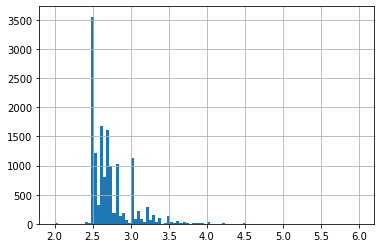

In [21]:
data['ceiling_height'].hist(bins=100, range = (2,6))

In [22]:
data['ceiling_height'].sort_values(ascending = False).head(30)

22822    100.0
3144      32.0
22291     32.0
21334     27.5
17825     27.0
21780     27.0
10755     27.0
5238      27.0
5797      27.0
20440     27.0
22890     27.0
4868      27.0
5660      26.0
11266     25.0
4636      25.0
355       25.0
18512     25.0
9363      25.0
14357     25.0
6236      25.0
5068      24.0
20469     22.6
17466     20.0
15036     14.0
22264     10.3
5853       8.3
15717      8.0
3470       8.0
17412      8.0
20227      6.0
Name: ceiling_height, dtype: float64

Логично предлоложить, что значения значения выше 20 м скорее всего записали ошибочно (например не 25 м , а 2.5 м).

In [23]:
data.loc[(data['ceiling_height'] >=20),'ceiling_height'] = data['ceiling_height']/10.0

Выведем значение столбца 'total_area'.

In [24]:
data['total_area'].sort_values()

19869     12.0
19772     13.0
17929     13.0
19511     13.0
19523     13.2
         ...  
5349     590.0
15626    618.0
3113     631.0
12840    631.2
19505    900.0
Name: total_area, Length: 23650, dtype: float64

In [25]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

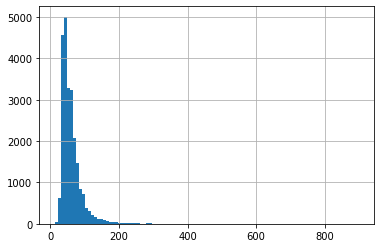

In [26]:
data['total_area'].hist(bins=100)

Отбросим большие значения параметра 'total_area', а именно которые больше или равны 200.

In [27]:
data = data.query('total_area < 200')
data['total_area'].describe()

count    23419.000000
mean        58.131265
std         26.455600
min         12.000000
25%         40.000000
50%         51.800000
75%         68.800000
max        199.200000
Name: total_area, dtype: float64

Выведем значение столбца 'rooms'.

In [28]:
data['rooms'].sort_values()

12210     0
17595     0
17629     0
10702     0
6462      0
         ..
14578     7
4428      8
8743      8
648      11
9672     11
Name: rooms, Length: 23419, dtype: int64

In [29]:
data['rooms'].describe()

count    23419.000000
mean         2.033691
std          0.995429
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [30]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,False,True,NaN,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23393,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,False,False,True,NaN,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23505,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23543,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,False,False,True,NaN,2,село Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Отбросим слишком большие и слишком маленькие значения параметра 'rooms'.

In [31]:
data = data.query('rooms > 0 & rooms < 10')
data['rooms'].describe()

count    23221.000000
mean         2.050084
std          0.978378
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Выведем значение столбца 'last_price'.

<AxesSubplot:>

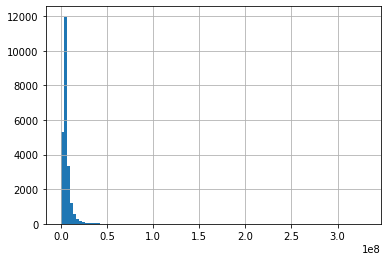

In [32]:
data['last_price'].hist(bins=100)

In [33]:
data['last_price'].sort_values()

8778         12190.0
17426       430000.0
14886       430000.0
16247       440000.0
17645       450000.0
            ...     
16617    122000000.0
4988     124000000.0
17880    135000000.0
22784    289238400.0
1435     330000000.0
Name: last_price, Length: 23221, dtype: float64

Добавим столбец цены квартиры в тысячах.

In [34]:
data['last_price_in_thousands'] = round(data['last_price']/1000,2)

In [35]:
data['last_price_in_thousands'].describe()

count     23221.000000
mean       6044.974998
std        6245.962521
min          12.190000
25%        3445.000000
50%        4600.000000
75%        6700.000000
max      330000.000000
Name: last_price_in_thousands, dtype: float64

<AxesSubplot:>

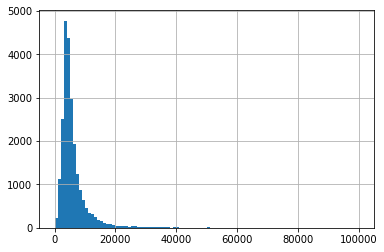

In [36]:
data['last_price_in_thousands'].hist(bins = 100,range=(0,100000))

Отсеим слишком маленькие значения и слишком большие в столбце 'last_price_in_thousands'.

In [37]:
data = data.query('last_price_in_thousands > 2000 & last_price_in_thousands < 25000')

data['last_price_in_thousands'].describe()

count    21468.000000
mean      5831.868107
std       3469.797675
min       2006.000000
25%       3600.000000
50%       4780.000000
75%       6751.265000
max      24900.000000
Name: last_price_in_thousands, dtype: float64

<AxesSubplot:>

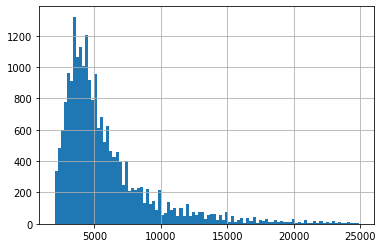

In [38]:
data['last_price_in_thousands'].hist(bins = 100)

Выведем значение столбца 'floors_total'.

In [39]:
data['floors_total'].sort_values(ascending = False).head(50)

2251     60.0
16701    52.0
16904    37.0
397      36.0
11061    36.0
5797     36.0
1060     35.0
7224     35.0
12939    35.0
12868    35.0
18186    35.0
1916     35.0
5798     35.0
8482     35.0
9170     35.0
21765    35.0
871      35.0
22898    35.0
4847     35.0
9354     35.0
15955    35.0
14322    35.0
20898    35.0
21556    35.0
18584    35.0
2962     35.0
18596    35.0
13952    35.0
1696     34.0
11556    33.0
3792     29.0
806      28.0
8607     28.0
14119    28.0
324      28.0
14694    28.0
14163    28.0
23495    28.0
22969    28.0
7697     28.0
19104    28.0
4551     28.0
14843    28.0
6387     28.0
16954    28.0
18151    28.0
20836    28.0
13995    28.0
12929    28.0
14010    28.0
Name: floors_total, dtype: float64

In [40]:
data['floors_total'].sort_values().head(50)

5777     1.0
8374     1.0
19555    1.0
4372     1.0
5292     1.0
14811    1.0
8321     1.0
17713    1.0
22504    1.0
15518    1.0
16990    1.0
11622    1.0
22808    1.0
757      2.0
1176     2.0
12621    2.0
10680    2.0
16118    2.0
10677    2.0
1169     2.0
16646    2.0
19173    2.0
23512    2.0
5951     2.0
5945     2.0
18603    2.0
19179    2.0
2260     2.0
21591    2.0
2870     2.0
20896    2.0
19787    2.0
16672    2.0
22890    2.0
18161    2.0
6679     2.0
12509    2.0
17691    2.0
15143    2.0
3016     2.0
12532    2.0
15085    2.0
7592     2.0
18913    2.0
21780    2.0
2052     2.0
20733    2.0
2177     2.0
9092     2.0
3504     2.0
Name: floors_total, dtype: float64

Аномалий в столбце 'floors_total' не обнаружено.

Выведем значение столбца 'living_area'.

In [41]:
data['living_area'].sort_values(ascending = False).head(50)

21633    164.7
22857    159.6
9376     150.8
11781    147.2
18757    145.4
16172    145.0
4702     142.0
12530    140.0
13706    140.0
12548    140.0
9872     136.1
4432     133.4
18132    128.0
5701     127.7
10172    127.0
417      126.6
15622    126.6
1812     126.4
23399    126.0
2259     125.9
1942     125.7
15666    125.5
807      125.1
670      125.0
1067     125.0
8477     124.9
3115     124.0
7553     123.6
12023    123.6
10057    123.0
6969     123.0
13322    122.1
16682    122.0
22756    122.0
3348     122.0
2037     121.6
18415    120.0
7785     120.0
5664     119.9
335      119.5
14865    118.9
12215    118.5
16626    118.4
3541     117.4
12352    117.1
7376     117.0
11114    117.0
19243    117.0
7113     116.2
4428     115.8
Name: living_area, dtype: float64

In [42]:
data['living_area'].sort_values().head(50)

13892     2.0
3238      3.0
21898     5.4
16404     6.0
19216     6.5
20954     8.0
23160     8.0
114       8.3
2307      8.4
21462     8.5
17218     8.9
680       9.0
4095      9.0
8311      9.0
22207     9.0
1325      9.0
7300      9.0
19585     9.0
4535      9.0
15807     9.0
22428     9.1
21863     9.8
19218    10.0
7686     10.0
12368    10.0
8072     10.0
4789     10.0
12158    10.0
615      10.0
18246    10.0
19276    10.0
2695     10.0
15530    10.0
10502    10.0
5011     10.0
19869    10.0
10273    10.0
14080    10.0
19772    10.0
21350    10.0
7447     10.0
7815     10.0
10301    10.0
12085    10.0
21325    10.0
10421    10.0
248      10.0
2650     10.0
21864    10.0
23310    10.0
Name: living_area, dtype: float64

Аномалий в столбце 'living_area' не обнаружено.

Выведем значение столбца 'floor'.

In [43]:
data['floor'].sort_values()

20515     1
2755      1
18804     1
2757      1
21278     1
         ..
11061    29
1916     30
18596    31
11556    32
18186    33
Name: floor, Length: 21468, dtype: int64

Аномалий в столбце 'floor' не обнаружено.

Выведем значение столбца 'kitchen_area'.

In [44]:
data['kitchen_area'].sort_values()

20180    1.3
16340    2.0
6252     2.0
906      2.0
9122     2.0
        ... 
23606    NaN
23614    NaN
23621    NaN
23630    NaN
23647    NaN
Name: kitchen_area, Length: 21468, dtype: float64

Аномалий в столбце 'kitchen_area' не обнаружено.

Выведем значение столбца 'balcony'.

In [45]:
data['balcony'].sort_values()

0        0
10698    0
10699    0
10700    0
10701    0
        ..
11543    5
11550    5
22329    5
11432    5
16359    5
Name: balcony, Length: 21468, dtype: int64

Аномалий в столбце 'balcony' не обнаружено.

Выведем значение столбца 'airports_nearest'.

In [46]:
data['airports_nearest'].sort_values()

21045       0.0
4012     6450.0
12879    6450.0
7764     6914.0
23102    6949.0
          ...  
23630       NaN
23633       NaN
23634       NaN
23646       NaN
23647       NaN
Name: airports_nearest, Length: 21468, dtype: float64

Аномалий в столбце 'airports_nearest' не обнаружено.

Выведем значение столбца 'parks_around_3000'.

In [47]:
data['parks_around_3000'].sort_values()

11803    0
19326    0
10961    0
10962    0
19325    0
        ..
6721     3
6703     3
21047    3
7107     3
8577     3
Name: parks_around_3000, Length: 21468, dtype: int64

Аномалий в столбце 'parks_around_3000' не обнаружено.

Выведем значение столбца 'days_exposition'.

In [48]:
data['days_exposition'].sort_values().head(50)

1631     1.0
13040    2.0
16026    2.0
16185    2.0
3690     3.0
9599     3.0
10956    3.0
16658    3.0
294      3.0
16656    3.0
9597     3.0
3853     3.0
18621    3.0
1500     3.0
16604    3.0
18992    3.0
8029     3.0
20478    3.0
5759     3.0
15178    3.0
15983    3.0
4658     3.0
8998     3.0
11052    3.0
16560    3.0
21755    3.0
18025    3.0
19658    3.0
4690     3.0
23322    3.0
13779    3.0
2443     3.0
9631     3.0
4929     3.0
13551    3.0
9701     3.0
10433    3.0
16870    3.0
3304     3.0
10408    3.0
19350    3.0
4873     3.0
17721    3.0
5687     3.0
17734    3.0
4057     3.0
21575    3.0
2349     3.0
21579    3.0
16763    3.0
Name: days_exposition, dtype: float64

In [49]:
data['days_exposition'].sort_values(ascending = False).head(50)

18810    1580.0
9537     1553.0
1884     1513.0
20929    1512.0
6681     1512.0
14070    1497.0
15288    1489.0
19088    1485.0
11936    1484.0
4728     1477.0
2937     1458.0
5996     1452.0
9539     1434.0
14848    1430.0
11966    1417.0
20956    1413.0
6716     1406.0
10346    1391.0
12028    1375.0
4105     1373.0
12182    1368.0
12190    1363.0
11402    1362.0
17898    1361.0
23377    1360.0
9485     1355.0
12468    1350.0
21711    1349.0
21816    1346.0
17728    1346.0
398      1345.0
7009     1344.0
13224    1341.0
749      1336.0
22410    1334.0
20731    1332.0
12017    1325.0
18955    1322.0
3247     1315.0
4881     1314.0
7916     1314.0
13577    1313.0
4233     1312.0
19249    1309.0
4781     1305.0
3993     1299.0
11756    1293.0
353      1292.0
21049    1281.0
8346     1280.0
Name: days_exposition, dtype: float64

Аномалий в столбце 'days_exposition' не обнаружено.

Проверим количество отбрасываемых данных:

In [50]:
data.shape[0]/23699

0.9058610067935355

~90.6% от первоначальных данных осталось после отброса данных.

<b>Вывод:</b>
1. Названия столбцов были приведены в соответствие с хорошим стилем.
2. Было изучено количество пропущенных значений, заменено их там, где это возможно, а именно в столбцах 'is_apartment','balcony','parks_around_3000','ponds_around_3000'.
3. Были изучены типы столбцов и изменены, там, где это необходимо, а именно в столбцах 'first_day_exposition', 'balcony','parks_around_3000','ponds_around_3000'.
4. Утранены неявные дубликаты в названиях населенного пункта (изначальное количество уникальных значений 365, после исключения дубликатов 316).
5. Утранены редкие и выбивающиеся значения, а именно в столбцах 'ceiling_height'. Отброшены слишком большие значения и слишком маленькие в столбцах со стоимостью квартиры, количеством комнат и общей площадью. ~90.6% от первоначальных данных осталось после отброса данных.

### Посчитайте и добавьте в таблицу новые столбцы

3.1 Добавим новый столбец 'price_of_one_square_meter' (цена одного квадратного метра).

In [51]:
data['price_of_one_square_meter'] = data['last_price']/data['total_area']
data['price_of_one_square_meter']

0        120370.370370
1         82920.792079
2         92785.714286
4        100000.000000
5         95065.789474
             ...      
23644     73717.948718
23645     72490.845228
23646     52542.372881
23647     44091.710758
23648    149511.400651
Name: price_of_one_square_meter, Length: 21468, dtype: float64

3.2 Добавим новый столбец 'day_of_the_week_of_publication_of_announcement' (день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)).

In [52]:
data['day_of_the_week_of_publication_of_announcement']=data['first_day_exposition'].dt.weekday
data['day_of_the_week_of_publication_of_announcement']

0        3
1        1
2        3
4        1
5        0
        ..
23644    4
23645    1
23646    0
23647    6
23648    1
Name: day_of_the_week_of_publication_of_announcement, Length: 21468, dtype: int64

3.3 Добавим новый столбец 'month_of_publication_of_ad' (месяц публикации объявления).

In [53]:
data['month_of_publication_of_ad'] = data['first_day_exposition'].dt.month
data['month_of_publication_of_ad'] 

0         3
1        12
2         8
4         6
5         9
         ..
23644     8
23645     3
23646     1
23647     2
23648     3
Name: month_of_publication_of_ad, Length: 21468, dtype: int64

3.4 Добавим новый столбец 'year_of_publication_of_announcement' (год публикации объявления).

In [54]:
data['year_of_publication_of_announcement'] = data['first_day_exposition'].dt.year
data['year_of_publication_of_announcement']

0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23644    2016
23645    2017
23646    2018
23647    2018
23648    2017
Name: year_of_publication_of_announcement, Length: 21468, dtype: int64

3.5 Добавим новый столбец 'type_of_apartment_floor' (тип этажа квартиры  (значения — «‎первый», «последний», «другой»)).

In [55]:
data['type_of_apartment_floor'] = data['floor']
data['type_of_apartment_floor'] = data['type_of_apartment_floor'].where(data['type_of_apartment_floor'] != 1, 'первый')
data['type_of_apartment_floor'] = data['type_of_apartment_floor'].where(data['type_of_apartment_floor'] != data['floors_total'], 'последний')
data['type_of_apartment_floor'] = data['type_of_apartment_floor'].where((data['type_of_apartment_floor'] == 'первый') | (data['type_of_apartment_floor'] == 'последний'), 'другой')
data['type_of_apartment_floor']


0        другой
1        первый
2        другой
4        другой
5        другой
          ...  
23644    другой
23645    другой
23646    другой
23647    первый
23648    другой
Name: type_of_apartment_floor, Length: 21468, dtype: object

3.6 Добавим новый столбец 'distance_to_city_center_in_kilometers' (расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)).

In [56]:
data['distance_to_city_center_in_kilometers'] = round(data['city_сenters_nearest']/1000)

<b>Вывод:</b>

Были добавлены столбцы новые столбцы:
<li>цена одного квадратного метра;</li>
<li>день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);</li>
<li>месяц публикации объявления;</li>
<li>год публикации объявления;</li>
<li>тип этажа квартиры (значения — «первый», «последний», «другой»);</li>
<li>расстояние до центра города в километрах.</li>

### Проведите исследовательский анализ данных

4.1 Изучим параметры продаваемых квартир.

Построим гистограмму для параметра "общая площадь".

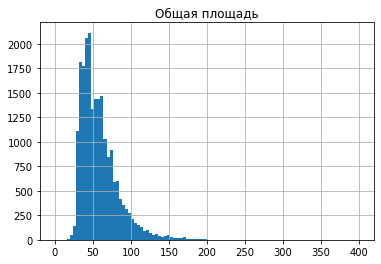

In [57]:
ax = data['total_area'].hist(bins = 100,range=(0,400))
ax.set_title('Общая площадь')
plt.show()

На гистограмме видно, что больше всего продаваемых квартир имеют площадь около 45 м².

Построим гистограмму для параметра "жилая площадь".

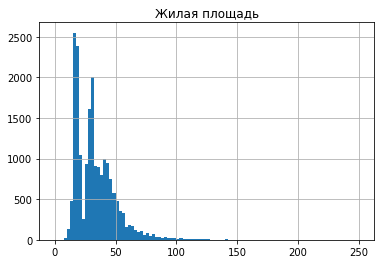

In [58]:
ax = data['living_area'].hist(bins = 100,range=(0,250))
ax.set_title('Жилая площадь')
plt.show()

На гистограмме видно, что больше всего продаваемых квартир имеют жилую площадь около 20 м² и 30 м².

Построим гистограмму для параметра "площадь кухни".

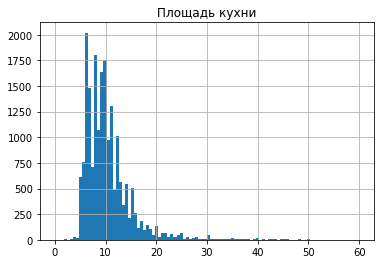

In [59]:
ax = data['kitchen_area'].hist(bins = 100,range=(0,60))
ax.set_title('Площадь кухни')
plt.show()

На гистограмме видно, что больше всего продаваемых квартир имеют площадь кухни около 6 м².

Построим гистограмму для параметра "цена объекта".

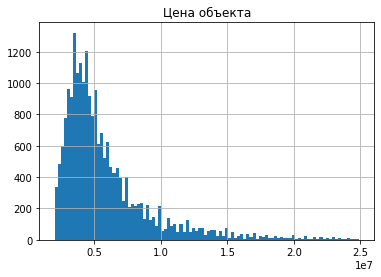

In [60]:
ax = data['last_price'].hist(bins = 100)
ax.set_title('Цена объекта')
plt.show()

Построим гистограмму по столбцу цены объекта в тысячах.

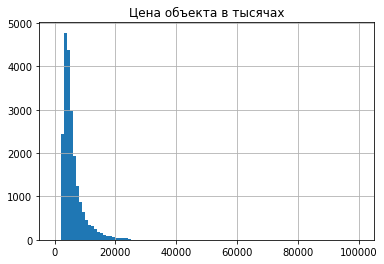

In [61]:
ax = data['last_price_in_thousands'].hist(bins = 100,range=(0,100000))
ax.set_title('Цена объекта в тысячах')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир имеют цену около 4 000 000.

Построим гистограмму для параметра "высота потолков".

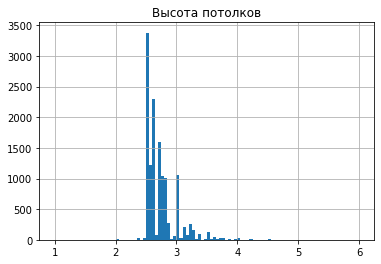

In [62]:
ax = data['ceiling_height'].hist(bins = 100,range=(1,6))
ax.set_title('Высота потолков')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир высоту потолков около 2.5 метров.

Построим гистограмму для параметра "количество комнат".

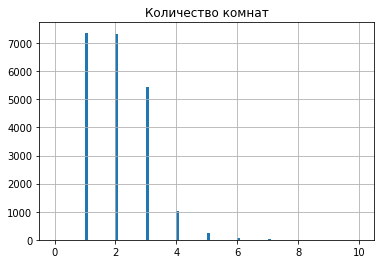

In [63]:
ax = data['rooms'].hist(bins = 100,range=(0,10))
ax.set_title('Количество комнат')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир имеют 1 или 2 комнаты.

Построим гистограмму для параметра "этаж квартиры".

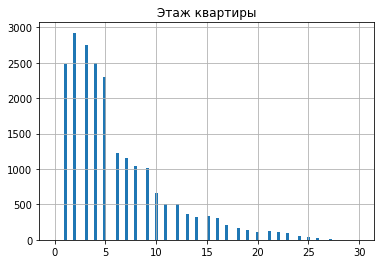

In [64]:
ax = data['floor'].hist(bins = 100,range=(0,30))
ax.set_title('Этаж квартиры')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся на 2 этаже. 

Построим гистограмму для параметра "тип этажа квартиры".

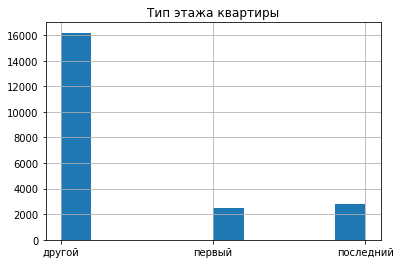

In [65]:
ax = data['type_of_apartment_floor'].hist()
ax.set_title('Тип этажа квартиры')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся не на первом и последнем этажах.

Также можно отметить, что на последнем этаже продаются квартиры чаще, чем на первом этаже.

Построим гистограмму для параметра "общее количество этажей в доме".

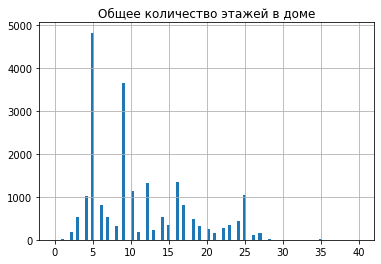

In [66]:
ax = data['floors_total'].hist(bins = 100,range=(0,40))
ax.set_title('Общее количество этажей в доме')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся в домах, где всего 5 и 8 этажей.

Построим гистограмму для параметра "расстояние до центра города в метрах".

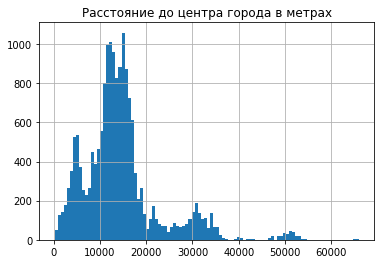

In [67]:
ax = data['city_сenters_nearest'].hist(bins = 100)
ax.set_title('Расстояние до центра города в метрах')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся от центра в 15 000 метрах.

Построим гистограмму для параметра "расстояние до ближайшего аэропорта".

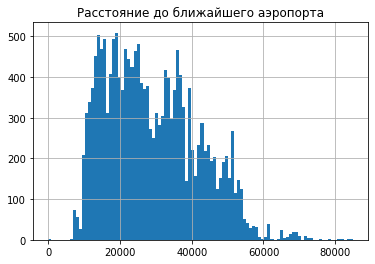

In [68]:
ax = data['airports_nearest'].hist(bins = 100)
ax.set_title('Расстояние до ближайшего аэропорта')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся в 25 000 метрах до ближайшего аэропорта.

Построим гистограмму для параметра "расстояние до ближайшего парка".

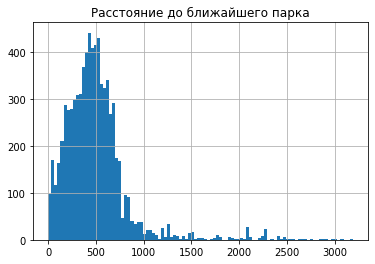

In [69]:
ax = data['parks_nearest'].hist(bins = 100)
ax.set_title('Расстояние до ближайшего парка')
plt.show()

По гистограмме видно, что больше всего продаваемых квартир находятся в 450 метрах до ближайшего парка.

Построим гистограмму для параметра "день недели публикации объявления".

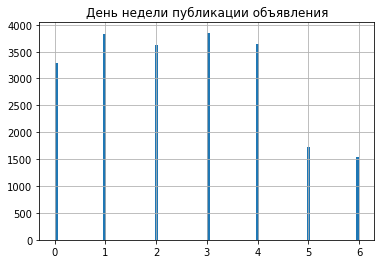

In [70]:
ax = data['day_of_the_week_of_publication_of_announcement'].hist(bins = 100)
ax.set_title('День недели публикации объявления')
plt.show()

По гистограмме видно, что чаще всего квартиры продаются в четверг и во вторник. 

В выходные квартиры продаются реже всего.

Построим гистограмму для параметра "месяц публикации объявления".

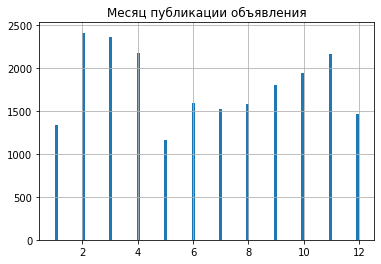

In [71]:
ax = data['month_of_publication_of_ad'].hist(bins = 100)
ax.set_title('Месяц публикации объявления')
plt.show()

По гистограмме видно, что чаще всего квартиры продаются в феврале и марте.

Реже всего квартиры продаются в мае и в январе.

4.2 Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

<AxesSubplot:>

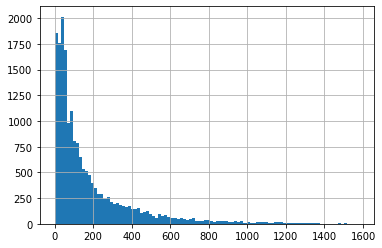

In [72]:
data['days_exposition'].hist(bins=100)

In [73]:
data['days_exposition'].describe()

count    18701.000000
mean       179.082830
std        218.144078
min          1.000000
25%         44.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [74]:
data.query('(days_exposition > 10)&(days_exposition < 1000 )')['days_exposition'].describe()

count    17295.000000
mean       176.487193
std        187.669729
min         11.000000
25%         46.000000
50%        103.000000
75%        233.000000
max        999.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

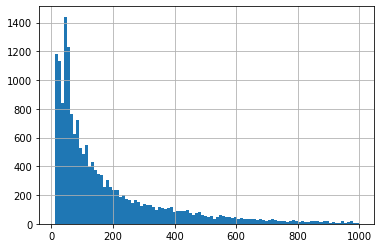

In [75]:
data.query('(days_exposition > 10) & (days_exposition < 1000)')['days_exposition'].hist(bins=100)

Слишком быстрыми продажами можно считать те, которые размещались на сайте меньше недели.

Необычно долгими продажами можно считать те, которые длились более трех лет.

4.3 Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?

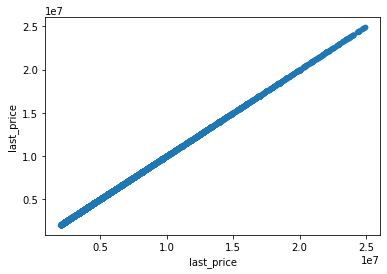

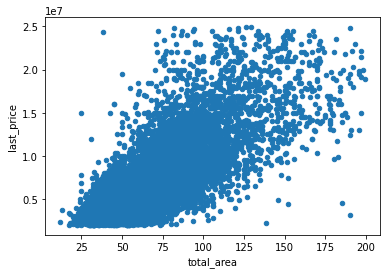

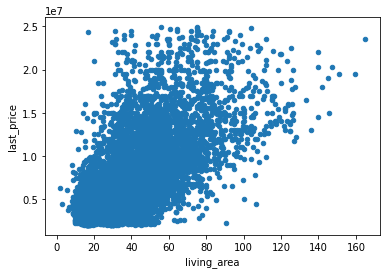

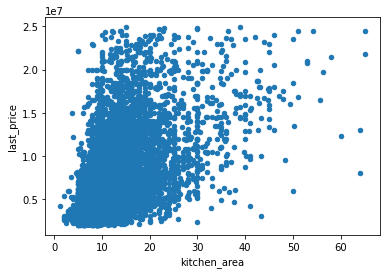

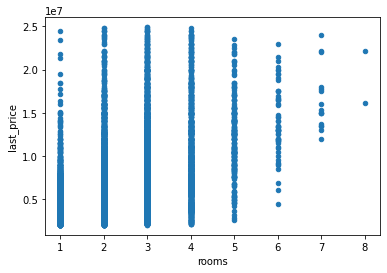

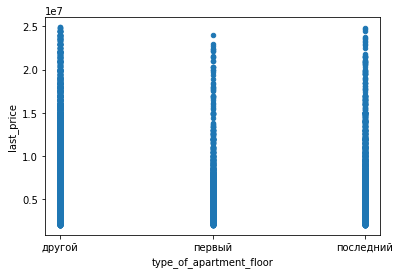

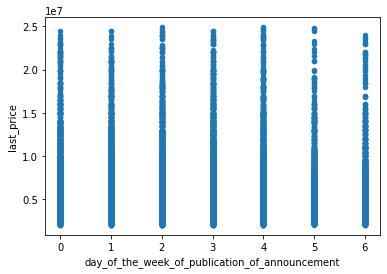

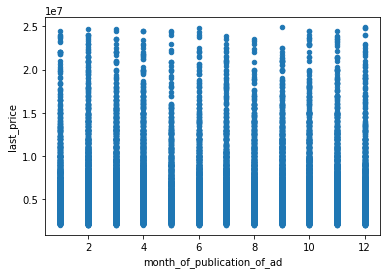

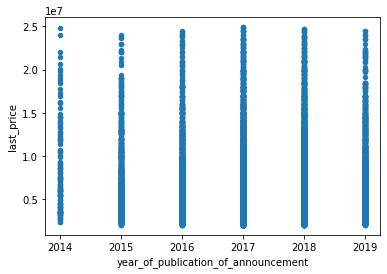

In [76]:
impact_on_total_cost = pd.DataFrame(data=data, columns=['last_price','total_area','living_area','kitchen_area','rooms','type_of_apartment_floor','day_of_the_week_of_publication_of_announcement','month_of_publication_of_ad','year_of_publication_of_announcement'])

for value in impact_on_total_cost:
    #print(impact_on_total_cost['last_price'].corr(impact_on_total_cost[value]))
    impact_on_total_cost.plot(x=value, y='last_price', kind='scatter') 
 


In [77]:
print('Корреляция между ценой и общей площадью составляет', data['last_price'].corr(data['total_area']))
print('Корреляция между ценой и жилой площадью составляет', data['last_price'].corr(data['living_area']))
print('Корреляция между ценой и площадью кухни составляет', data['last_price'].corr(data['kitchen_area']))
print('Корреляция между ценой и количеством комнат составляет', data['last_price'].corr(data['rooms']))

Корреляция между ценой и общей площадью составляет 0.7850119693738742
Корреляция между ценой и жилой площадью составляет 0.6727780125151498
Корреляция между ценой и площадью кухни составляет 0.5799819998414869
Корреляция между ценой и количеством комнат составляет 0.5043560667257467


По построенным диаграммам рассеяния можно сделать следующий вывод:

1. Чем больше общая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.79).

2. Чем больше жилая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.67).

3. Чем больше площадь кухни, тем уровень цены становится выше (положительная корреляция выше среднего 0.58).

4. Дороже всего продаются квартиры с 4 и 5 комнатами (средняя корреляция 0.5).

5. Дешевле всего продаются квартиры на первом этаже.
На последнем этаже и на других этажах квартиры продаются примерно одинаково.

6. Цены в среду и пятницу бывают выше, чем в другие дни.

7. Цены в апреле выше, чем в другие месяцаю Самые низкие цены в ноябре.

8. За весь предоставленный период можно сделать вывод, что в 2014 году были цены на квартиры нижк, чем в другие года. 

4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [78]:
number_of_ads_in_localities = data.pivot_table(index = 'locality_name', values = 'price_of_one_square_meter', aggfunc=['count','mean'])
number_of_ads_in_localities.columns=['Общее количество', 'Средняя цена одного квадратного метра']
number_of_ads_in_localities.sort_values(by = 'Общее количество', ascending = False).head(10).sort_values(by = 'Средняя цена одного квадратного метра', ascending = False)


,Общее количество,Средняя цена одного квадратного метра
locality_name,,
Санкт-Петербург,15051,109620.752415
Пушкин,360,102337.839613
деревня Кудрово,451,95150.960382
поселок Парголово,320,90655.253810
поселок Мурино,547,85701.152167
Петергоф,200,84838.847488
поселок Шушары,434,78507.552337
Колпино,337,75333.295801
Гатчина,287,70322.657779


Среди 10 населенных пунктах с наибольшим числом объявлений самая высокая стоимость квадратного метра является в Санкт-Петербурге (114856.31), а наименьшая стоимость в Выборге (58141.91).

4.5 Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 

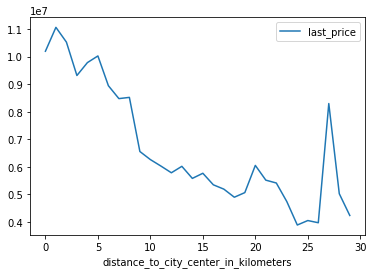

In [79]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'distance_to_city_center_in_kilometers', values = 'last_price').plot();

По графику можно сделать вывод, что в Санкт-Петербурге основном, чем ближе квартиры расположены к центру, тем выше цена.

<b>Вывод:</b>

1. Были изучены параметры продаваемых квартир с помощью построения диаграмм, по результатам которых можно сделать следующие выводы:

    1.1.Больше всего продаваемых квартир имеют:
        1.1.1 Общую площадь около 45 м².
        1.1.2 Жилую площадь около 20 м² и 30 м².
        1.1.3 Площадь кухни около 6 м².
        1.1.4 Цену около 4 000 000.
        1.1.5 Высоту потолков около 2.5 метров.
        1.1.6 1 или 2 комнаты.
        1.1.7 2 этаж
    
    1.2 Больше всего продаваемых квартир находятся не на первом и последнем этажах.
        Также можно отметить, что на последнем этаже продаются квартиры чаще, чем на первом этаже.
    
    1.3 Больше всего продаваемых квартир находятся в домах, где всего 5 и 8 этажей.
    
    1.4 Больше всего продаваемых квартир находятся от центра в 15 000 метрах.
    
    1.5 Больше всего продаваемых квартир находятся в 25 000 метрах до ближайшего аэропорта.
    
    1.6 Больше всего продаваемых квартир находятся в 450 метрах до ближайшего парка.
    
    1.7 Чаще всего квартиры продаются в четверг и во вторник. 
        В выходные квартиры продаются реже всего.
        
    1.8 Чаще всего квартиры продаются в феврале и марте.
        Реже всего квартиры продаются в мае и в январе.
        
2. Было изучено, как быстро продавались квартиры. 

 Слишком быстрыми продажами можно считать те, которые размещались на сайте меньше недели.

 Необычно долгими продажами можно считать те, которые длились более трех лет.


3. Были изучены факторы, которые больше всего влияют на общую (полную) стоимость объекта.
    
    3.1 По построенным диаграммам рассеяния можно сделать следующий вывод:

    3.2 Чем больше общая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.79).

    3.3 Чем больше жилая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.67).

    3.4 Чем больше площадь кухни, тем уровень цены становится выше (положительная корреляция выше среднего 0.58).

    3.5 Дороже всего продаются квартиры с 4 и 5 комнатами (средняя корреляция 0.5).

    3.6 Дешевле всего продаются квартиры на первом этаже. На последнем этаже и на других этажах квартиры продаются примерно одинаково.

    3.7 Цены в среду и пятницу бывают выше, чем в другие дни.

    3.8 Цены в апреле выше, чем в другие месяцаю Самые низкие цены в ноябре.

    3.9 За весь предоставленный период можно сделать вывод, что в 2014 году были цены на квартиры нижк, чем в другие года.
    
    
4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

 Среди 10 населенных пунктах с наибольшим числом объявлений самая высокая стоимость квадратного метра является в Санкт-Петербурге (114856.31), а наименьшая стоимость в Выборге (58141.91).


5. Выделили квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислили среднюю цену каждого километра.

 По построенному графику можно сделать вывод, что в Санкт-Петербурге основном, чем ближе квартиры расположены к центру, тем выше цена.


### Общий вывод

По результатам проведенного исследования можно сделать следующий вывод:

1. Первым шагом открыты данные и изучена полученная информация.


2. Вторым шагом были преобработанны данные:

    2.1 Названия столбцов были приведены в соответствие с хорошим стилем.
    
    2.2 Было изучено количество пропущенных значений, заменено их там, где это возможно, а именно в столбцах 'is_apartment','balcony','parks_around_3000','ponds_around_3000'.
    
    2.3 Были изучены типы столбцов и изменены, там, где это необходимо, а именно в столбцах 'first_day_exposition', 'balcony','parks_around_3000','ponds_around_3000'.
    
    2.4 Утранены неявные дубликаты в названиях населенного пункта (изначальное количество уникальных значений 365, после исключения дубликатов 316).
    
    2.5 Утранены редкие и выбивающиеся значения, а именно в столбцах 'ceiling_height'. Отброшены слишком большие значения и слишком маленькие в столбцах со стоимостью квартиры, количеством комнат и общей площадью. ~90.6% от первоначальных данных осталось после отброса данных.
    
    
3. В третьем шаге были добавлены новые столбцы:

      -цена одного квадратного метра;
      
      -день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
      
      -месяц публикации объявления;
      
      -год публикации объявления;
      
      -тип этажа квартиры (значения — «первый», «последний», «другой»);
      
      -расстояние до центра города в километрах.
      
      
 4.   Далее был проведен исследовательский анализ данных.
 
     4.1 Были изучены параметры продаваемых квартир с помощью построения диаграмм, по результатам которых можно сделать следующие выводы:

            4.1.1 Больше всего продаваемых квартир имеют:
                4.1.1.1 Общую площадь около 45 м².
                4.1.1.2 Жилую площадь около 20 м² и 30 м².
                4.1.1.3 Площадь кухни около 6 м².
                4.1.1.4 Цену около 4 000 000.
                4.1.1.5 Высоту потолков около 2.5 метров.
                4.1.1.6 1 или 2 комнаты.
                4.1.1.7 2 этаж

            4.1.2 Больше всего продаваемых квартир находятся не на первом и последнем этажах.
                Также можно отметить, что на последнем этаже продаются квартиры чаще, чем на первом этаже.

            4.1.3 Больше всего продаваемых квартир находятся в домах, где всего 5 и 8 этажей.

            4.1.4 Больше всего продаваемых квартир находятся от центра в 15 000 метрах.

            4.1.5 Больше всего продаваемых квартир находятся в 25 000 метрах до ближайшего аэропорта.

            4.1.6 Больше всего продаваемых квартир находятся в 450 метрах до ближайшего парка.

            4.1.7 Чаще всего квартиры продаются в четверг и во вторник. 
                В выходные квартиры продаются реже всего.

            4.1.8 Чаще всего квартиры продаются в феврале и марте.
                Реже всего квартиры продаются в мае и в январе.

    4.2. Было изучено, как быстро продавались квартиры. 

         Слишком быстрыми продажами можно считать те, которые размещались на сайте меньше недели.

         Необычно долгими продажами можно считать те, которые длились более трех лет.



    4.3. Были изучены факторы, которые больше всего влияют на общую (полную) стоимость объекта.

        4.3.1 По построенным диаграммам рассеяния можно сделать следующий вывод:

        4.3.2 Чем больше общая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.79).

        4.3.3 Чем больше жилая площадь, тем уровень цены становится выше (высокая положительная корреляция 0.67).

        4.3.4 Чем больше площадь кухни, тем уровень цены становится выше (положительная корреляция выше среднего 0.58).

        4.3.5 Дороже всего продаются квартиры с 4 и 5 комнатами (средняя корреляция 0.5).

        4.3.6 Дешевле всего продаются квартиры на первом этаже. На последнем этаже и на других этажах квартиры продаются примерно одинаково.

        4.3.7 Цены в среду и пятницу бывают выше, чем в другие дни.

        4.3.8 Цены в апреле выше, чем в другие месяцаю Самые низкие цены в ноябре.

        4.3.9 За весь предоставленный период можно сделать вывод, что в 2014 году были цены на квартиры нижк, чем в другие года.


    4.4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

     Среди 10 населенных пунктах с наибольшим числом объявлений самая высокая стоимость квадратного метра является в Санкт-Петербурге (114856.31), а наименьшая стоимость в Выборге (58141.91).


    4.5. Выделили квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислили среднюю цену каждого километра.

     По построенному графику можно сделать вывод, что в Санкт-Петербурге основном, чем ближе квартиры расположены к центру, тем выше цена.